# Import Packages

In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from scipy.stats import norm
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

%load_ext autotime

# Read the Excel Data

In [8]:
df = pd.read_csv('TRAIN_Duchessa.csv')

In [9]:
df.count()

vessel_name                 1465070
vessel_class                1465070
datetime_utc                1465070
sog                         1191440
me_power                    1013901
me_rpm                      1074125
heading                     1400166
apparent_wind_dir_degree    1357601
me_consumption_kg_h         1070852
apparent_wind_speed_kn      1340634
mean_draft_aft_vessel        598472
mean_draft_fore_vessel       730104
vessel_condition            1328350
dtype: int64

In [12]:
df.isna().sum()

vessel_name                 0
vessel_class                0
datetime_utc                0
sog                         0
me_power                    0
me_rpm                      0
heading                     0
apparent_wind_dir_degree    0
me_consumption_kg_h         0
apparent_wind_speed_kn      0
mean_draft_aft_vessel       0
mean_draft_fore_vessel      0
vessel_condition            0
dtype: int64

In [11]:
df = df.dropna(thresh=13) 

In [13]:
df.columns.to_list()

['vessel_name',
 'vessel_class',
 'datetime_utc',
 'sog',
 'me_power',
 'me_rpm',
 'heading',
 'apparent_wind_dir_degree',
 'me_consumption_kg_h',
 'apparent_wind_speed_kn',
 'mean_draft_aft_vessel',
 'mean_draft_fore_vessel',
 'vessel_condition']

In [14]:
# df = df.loc[df['me_power'] > 0 ]

In [15]:
# df = df.loc[df['me_rpm'] > 50 ]   

In [16]:
df = df.loc[df['apparent_wind_dir_degree'] >= 0 ]

In [17]:
# df = df.loc[df['me_consumption_kg_h'] > 0 ]

In [18]:
df.describe()

,sog,me_power,me_rpm,heading,apparent_wind_dir_degree,me_consumption_kg_h,apparent_wind_speed_kn,mean_draft_aft_vessel,mean_draft_fore_vessel
count,498515.000000,498515.000000,498515.000000,498515.000000,498515.000000,498515.000000,498515.000000,498515.000000,498515.000000
mean,6.599873,2124.407638,38.281388,179.560054,180.286257,419.637699,19.999379,6.621892,9.130459
std,6.090221,2137.795571,35.918923,103.554413,124.075667,401.082298,11.379217,4.857576,2.429958
min,0.000000,-80.822455,-14.508230,0.000000,0.000000,-7415.084268,0.000000,-0.130000,-0.700000
25%,0.076821,-0.000000,0.000000,89.356972,52.128200,1.479965,11.904492,4.778840,6.707291
50%,10.009079,2774.085394,64.160860,180.950340,184.352780,546.996200,19.326071,6.716166,9.793754
75%,12.521930,3999.718507,72.813014,269.601413,307.513455,726.172050,27.043824,7.900470,11.188730
max,20.560308,8735.205348,93.801760,359.000000,359.000000,3597.428290,49.998849,100.000000,14.260035


# Feature Engineering of Wind Angle and Heading to obtain Impact

    Heading Angle Rad, Cos and Sin

In [19]:
# Heading to rad

df['HEADING RAD'] = df['heading'].astype(float).apply(math.radians)

In [20]:
# Rad Heading to Cos

df['COS HEADING RAD'] = df['HEADING RAD'].astype(float).apply(math.cos)           # OUTPUT 1

In [21]:
# Rad Heading to Cos

df['SIN HEADING RAD'] = df['HEADING RAD'].astype(float).apply(math.sin)           # OUTPUT 2

    Wind Angle Rad, Cos and Sin

In [22]:
# Wind angle to Rad

df['WIND ANGLE RAD'] = df['apparent_wind_dir_degree'].astype(float).apply(math.radians)                         

In [23]:
# Rad Wind Angle to Cos

df['COS WIND ANGLE RAD'] = df['WIND ANGLE RAD'].astype(float).apply(math.cos)     # OUTPUT 3

In [24]:
# Rad Wind Angle to Sin

df['SIN WIND ANGLE RAD'] = df['WIND ANGLE RAD'].astype(float).apply(math.sin)     # OUTPUT 4

    Difference Formula for Cosine:
    
        cos(a-b) = cosa cosb + sina sinb

In [25]:
df['IMPACT'] = (df['COS WIND ANGLE RAD'] * df['COS HEADING RAD']) + (df['SIN WIND ANGLE RAD'] * df['SIN HEADING RAD'])

In [26]:
df['IMPACT'].describe()              

count    498515.000000
mean         -0.008962
std           0.713540
min          -1.000000
25%          -0.733876
50%          -0.014247
75%           0.706942
max           1.000000
Name: IMPACT, dtype: float64

In [27]:
df['WEATHER IMPACT'] = df['apparent_wind_speed_kn'] * df['IMPACT']

In [28]:
df['WEATHER IMPACT'].describe()

count    498515.000000
mean         -0.442589
std          16.556876
min         -49.976222
25%         -11.461001
50%           0.000000
75%          10.368776
max          49.972143
Name: WEATHER IMPACT, dtype: float64

# Feature Engineering of Draft

In [29]:
df['DRAFT']=df[['mean_draft_aft_vessel', 'mean_draft_fore_vessel']].mean(axis=1)

In [30]:
df = df.loc[df['DRAFT'] >= 4 ]  

In [31]:
df = df.loc[df['DRAFT'] <= 14 ]  

In [32]:
df.describe()

,sog,me_power,me_rpm,heading,apparent_wind_dir_degree,me_consumption_kg_h,apparent_wind_speed_kn,mean_draft_aft_vessel,mean_draft_fore_vessel,HEADING RAD,COS HEADING RAD,SIN HEADING RAD,WIND ANGLE RAD,COS WIND ANGLE RAD,SIN WIND ANGLE RAD,IMPACT,WEATHER IMPACT,DRAFT
count,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,4.960050e+05,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000,496005.000000
mean,6.630315,2135.069499,38.467698,180.153706,180.496944,421.773882,20.047313,6.411061,9.161228,3.144275,-1.342577e-02,-0.022939,3.150266,0.337590,-0.027492,-0.008966,-0.441900,7.786144
std,6.087431,2137.876459,35.912674,103.394811,124.159300,400.954577,11.376180,1.657935,2.392572,1.804580,7.101255e-01,0.703575,2.166989,0.658314,0.672236,0.713611,16.593635,1.952155
min,0.000000,-80.822455,-14.508230,0.000000,0.000000,-7415.084268,0.000000,2.948940,-0.700000,0.000000,-1.000000e+00,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-49.976222,4.013150
25%,0.080020,0.000000,0.000000,89.708840,51.996299,1.597765,11.975443,4.781662,6.721140,1.565715,-7.170159e-01,-0.748614,0.907507,-0.170642,-0.653790,-0.733979,-11.520429,5.723130
50%,10.161650,2804.736263,64.451540,181.932760,184.965380,549.528560,19.378613,6.716909,9.808058,3.175326,6.123234e-17,-0.017452,3.228255,0.614004,-0.074579,-0.014112,0.000000,8.390041
75%,12.527367,4003.566475,72.835130,269.925187,307.774249,726.811934,27.074248,7.893710,11.192190,4.711083,6.913203e-01,0.675285,5.371674,0.911803,0.589467,0.707174,10.434023,9.548760
max,20.560308,8735.205348,93.801760,359.000000,359.000000,3597.428290,49.998849,10.300000,14.260035,6.265732,1.000000e+00,1.000000,6.265732,1.000000,1.000000,1.000000,49.972143,12.280000


In [33]:
# for i in df['DRAFT']:
#     if i > 7.8:
#         df['TARGET'] = print('Laden')
#     else:
#         df['TARGET'] = print('Ballast')

# Feature Engineering of Speed over Ground

In [34]:
df['Cubed Speed'] = (df['sog'])**3

# Preparing Data Set for Regression

In [35]:
data = df[['datetime_utc','WEATHER IMPACT','DRAFT','me_rpm', 'sog', 'Cubed Speed','me_power']]

In [36]:
# data.tail()

In [37]:
# data.describe()

# Corelation: Linearity Check

Text(0, 0.5, 'Power')

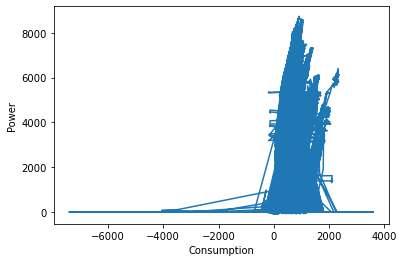

In [38]:
plt.plot(df['me_consumption_kg_h'],df['me_power'])
plt.xlabel('Consumption')
plt.ylabel('Power')

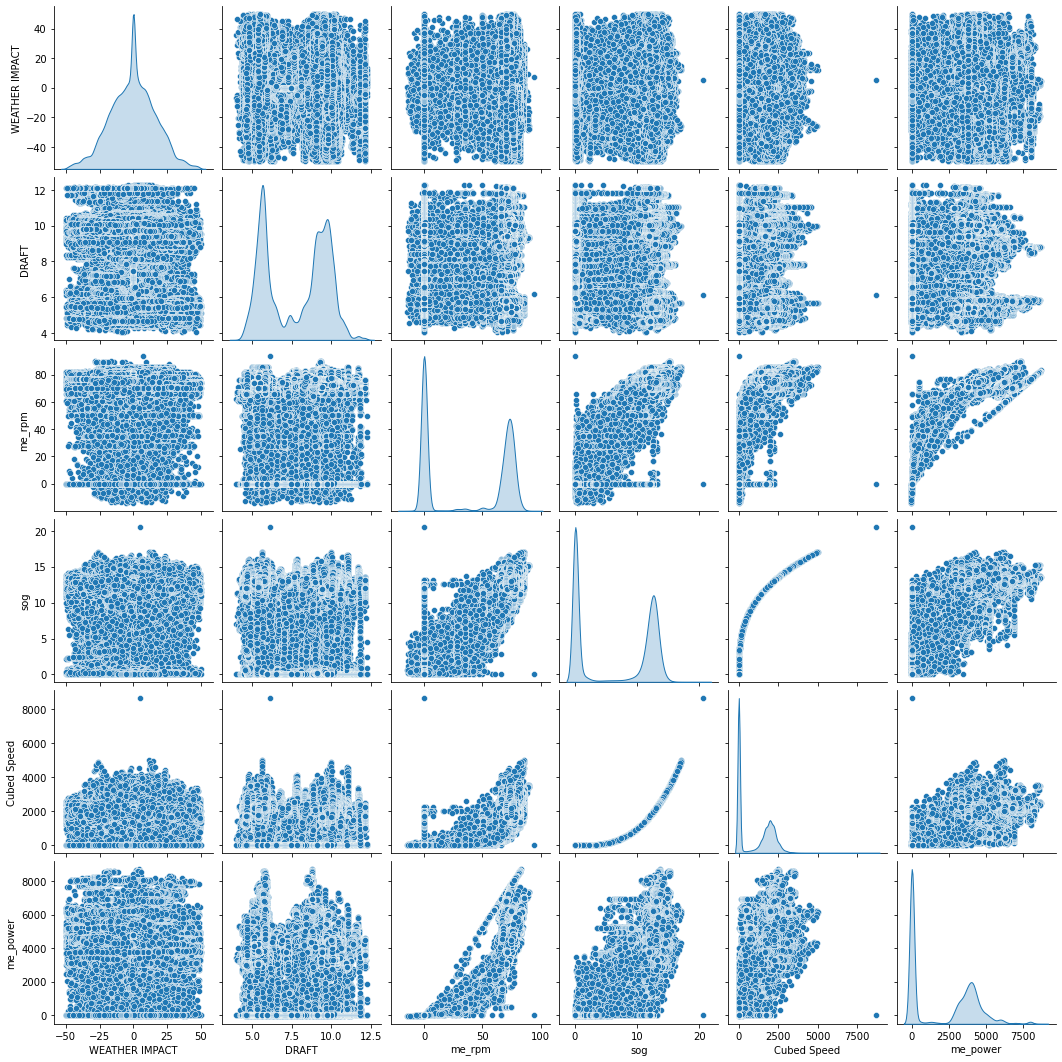

In [39]:
import seaborn as sns
sns.pairplot(data[['datetime_utc','WEATHER IMPACT','DRAFT','me_rpm', 'sog', 'Cubed Speed','me_power']], diag_kind = 'kde')

# KDE are the diagonal plots

# Linear Regression Model with Cube input

In [40]:
inputs_c = data[['WEATHER IMPACT','DRAFT','me_rpm','Cubed Speed']]                #                   -------- X
target_c = data['me_power']                                                       #                   ---------Y

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_c, target_c, test_size = 0.2)

In [42]:
reg_c = linear_model.LinearRegression()
reg_c.fit(X_train, y_train)

LinearRegression()

In [43]:
print(reg_c.coef_)
print(reg_c.intercept_)

[-1.99206845 36.36768889 49.6895131   0.25203717]
-315.7737977588349


      Score of the Model

In [44]:
linear_reg = reg_c.score(X_test, y_test)
linear_reg

0.9172451799958627

      R2 of the Model

In [45]:
y_cube = data['me_power']

In [46]:
y_pred_c = reg_c.predict(data[['WEATHER IMPACT','DRAFT','me_rpm','Cubed Speed']])

In [47]:
r2_score(y_cube, y_pred_c)

0.9174572327623484

      END

In [48]:
residuals = y_cube - y_pred_c

In [49]:
type(residuals)

pandas.core.series.Series

In [50]:
residuals.describe()

count    496005.000000
mean          0.472757
std         614.217221
min       -4545.124079
25%        -229.193052
50%           5.332607
75%         112.529910
max        3987.187950
Name: me_power, dtype: float64

In [51]:
# x = data['datetime_utc']
# y = residuals

In [52]:
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.title('Residual vrs Time Plot')
# plt.xlabel('Date')
# plt.ylabel('Residuals')

# # z = np.polyfit(x,y, 1)                   
# # p = np.poly1d(z)                           # Linear Predicted Value
# # plt.plot(x, p(x), "y.", label = "Residual line")
# plt.scatter(x,y, label = 'Residuals Computed')
# plt.legend()

# Random Forest Regression Model 

In [53]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
rfr = RandomForestRegressor(n_estimators = 50, random_state = 0)
 
# fit the regressor with x and y data
rfr.fit(X_train, y_train) 

# Check the score of the prediction
rfr.score(X_test, y_test)

# # Make predictions for the test set
# y_pred_test = regressor.predict(X_test)   
# y_pred_test

0.9916637758762822

In [54]:
actual = data['me_power']
predicted = rfr.predict(data[['WEATHER IMPACT','DRAFT','me_rpm','Cubed Speed']])
r2_score(actual, predicted)

0.9972862747885205

In [55]:
residuals_rfr = actual - predicted
residuals_rfr.describe()

count    496005.000000
mean          0.323951
std         111.368842
min       -4068.941328
25%          -2.088185
50%           0.000000
75%           0.117899
max        3915.689302
Name: me_power, dtype: float64

In [56]:
# x = data['datetime_utc']
# y = residuals_rfr

In [57]:
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.title('Residual vrs Time Plot')
# plt.xlabel('Date')
# plt.ylabel('Residuals')

# # z = np.polyfit(x,y, 1)                   
# # p = np.poly1d(z)                           # Linear Predicted Value
# # plt.plot(x, p(x), "y.", label = "Residual line")
# plt.scatter(x,y, label = 'Residuals Computed')
# plt.legend()

# Plotting Actual vrs Predicted

In [59]:
# shipspeed = data['SHIP SPEED (GROUND)']

In [61]:
# import matplotlib.pyplot as plt

# # plotting the line 1 points 
# plt.scatter(shipspeed, y_cube, label = "True", c = 'green', marker='.')

# # plotting the line 2 points 
# plt.scatter(shipspeed , y_pred_l, label = "Linear Predicted", c='red', marker='.')

# # plotting the line 2 points 
# plt.scatter(shipspeed , y_pred_c, label = "Cube Predicted", c='blue', marker='.')

# # https://www.tutorialspoint.com/how-can-i-draw-a-scatter-trend-line-using-matplotlib
# zz = np.polyfit(shipspeed, y_pred_c, 2)
# pp = np.poly1d(zz)                         # Cube Predicted Value
# plt.plot(shipspeed, pp(shipspeed), "k.", label = "Cube Predicted")


# z = np.polyfit(shipspeed, y_pred_l, 1)                   
# p = np.poly1d(z)                           # Linear Predicted Value
# plt.plot(shipspeed, p(shipspeed), "y.", label = "Linear Predicted")


# z1 = np.polyfit(shipspeed, y_cube, 1)                   
# p1 = np.poly1d(z1)                         # Normal Value
# plt.plot(shipspeed, p1(shipspeed), "m.", label = "Normal Value")

# #limiting y axis values for having starting values 0
# # plt.ylim(ymax = 5000, ymin = 0)

# plt.xlabel('Ship speed')
# # Set the y axis label of the current axis.
# plt.ylabel('Power')
# # Set a title of the current axes.
# plt.title('Actual vrs Predicted values of Power')
# # show a legend on the plot
# plt.legend()
# # Display a figure.
# plt.show()

# # For the "r-o" part ==  https://www.mathworks.com/matlabcentral/answers/282940-what-is-the-ro-in-plot-mean#answer_221098

# Model Test:
    Data: 30-12-2022 <-> 14-01-2022
        

In [62]:
test = pd.read_excel('TEST.xlsx', sheet_name = 'TEST')

In [63]:
test.columns.to_list()

['Sample time',
 'SOG',
 'HEADING(degree)',
 'ME RPM(RPM)',
 'Fore Draft',
 'Aft Draft',
 'WIND ANGLE(degree)',
 'WIND SPEED(m/h)',
 'Shaft Power',
 'ME and GE Total flow',
 'GE Inlet Flow',
 'GE Outlet Flow',
 'me_consumptions']

In [64]:
test.describe()

,SOG,HEADING(degree),ME RPM(RPM),Fore Draft,Aft Draft,WIND ANGLE(degree),WIND SPEED(m/h),Shaft Power,ME and GE Total flow,GE Inlet Flow,GE Outlet Flow,me_consumptions
count,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000
mean,11.621264,162.003112,71.584065,11.840442,8.518148,220.521630,15.848696,3961.226660,784.787763,1171.516307,1048.319835,661.591291
std,2.410651,37.243139,15.215857,0.222720,0.128533,114.106109,9.110806,1473.414216,249.192926,96.104173,95.200161,253.691949
min,0.000000,6.390530,-21.311970,9.750000,7.961790,0.039920,0.665330,-2.238010,112.490880,778.514630,688.466140,-92.426650
25%,11.800000,157.436685,73.781200,11.783845,8.424005,107.793505,8.404775,4377.905765,798.798600,1165.907005,1036.503935,680.568055
50%,12.110630,161.683730,76.314030,11.891460,8.534450,270.535270,14.272970,4602.586300,879.442220,1209.534060,1084.580070,760.870290
75%,12.446680,171.516890,76.577585,11.947110,8.616640,321.299540,21.769245,4667.046280,911.914725,1217.998295,1095.028465,789.351845
max,29.944260,355.209340,80.010910,12.477360,8.906560,357.451070,40.083130,4812.151520,1118.723200,1274.360180,1139.925320,991.523840


In [65]:
# test = test.loc[test['ME RPM(RPM)'] > 0 ]

In [66]:
# test = test.loc[test['Shaft Power'] > 0 ]

In [67]:
# test = test.loc[test['SOG'] >= 8 ]

In [68]:
# Heading to rad

test['HEADING RAD'] = test['HEADING(degree)'].astype(float).apply(math.radians)

In [69]:
# Rad Heading to Cos

test['COS HEADING RAD'] = test['HEADING RAD'].astype(float).apply(math.cos)           # OUTPUT 1

In [70]:
# Rad Heading to Cos

test['SIN HEADING RAD'] = test['HEADING RAD'].astype(float).apply(math.sin)           # OUTPUT 2

In [71]:
# Wind angle to Rad

test['WIND ANGLE RAD'] = test['WIND ANGLE(degree)'].astype(float).apply(math.radians)                         

In [72]:
# Rad Wind Angle to Cos

test['COS WIND ANGLE RAD'] = test['WIND ANGLE RAD'].astype(float).apply(math.cos)     # OUTPUT 3

In [73]:
# Rad Wind Angle to Cos

test['SIN WIND ANGLE RAD'] = test['WIND ANGLE RAD'].astype(float).apply(math.sin)     # OUTPUT 4

In [74]:
test['IMPACT'] = (test['COS WIND ANGLE RAD'] * test['COS HEADING RAD']) + (test['SIN WIND ANGLE RAD'] * test['SIN HEADING RAD'])

In [75]:
test['IMPACT'].describe()              

count    4607.000000
mean       -0.429914
std         0.597305
min        -1.000000
25%        -0.891618
50%        -0.621078
75%        -0.278186
max         0.999997
Name: IMPACT, dtype: float64

In [76]:
test['WEATHER IMPACT'] = test['WIND SPEED(m/h)'] * test['IMPACT']

In [77]:
test['WEATHER IMPACT'].describe()

count    4607.000000
mean       -9.173886
std        11.533757
min       -38.149990
25%       -16.919132
50%        -7.253307
75%        -2.418804
max        36.268354
Name: WEATHER IMPACT, dtype: float64

In [78]:
test['DRAFT'] = test[['Aft Draft', 'Fore Draft']].mean(axis=1)

In [79]:
test = test.loc[test['DRAFT'] > 5 ]  

In [80]:
test['Cubed Speed'] = (test['SOG'])**3

In [81]:
test.head(2)

,Sample time,SOG,HEADING(degree),ME RPM(RPM),Fore Draft,Aft Draft,WIND ANGLE(degree),WIND SPEED(m/h),Shaft Power,ME and GE Total flow,...,HEADING RAD,COS HEADING RAD,SIN HEADING RAD,WIND ANGLE RAD,COS WIND ANGLE RAD,SIN WIND ANGLE RAD,IMPACT,WEATHER IMPACT,DRAFT,Cubed Speed
0,2022-01-01 15:55:00,12.07687,161.67166,77.15782,11.90455,8.41946,278.31541,12.00316,3594.82445,1118.72320,...,2.821703,-0.94927,0.314462,4.857520,0.144622,-0.989487,-0.448442,-5.382718,10.162005,1761.421018
1,2022-01-01 14:55:00,11.93688,158.35390,77.08770,11.91171,8.44047,268.49701,7.03228,3447.94277,1104.25968,...,2.763797,-0.92948,0.368873,4.686157,-0.026229,-0.999656,-0.344366,-2.421679,10.176090,1700.875337


In [84]:
test_pred = rfr.predict(test[['WEATHER IMPACT','DRAFT','ME RPM(RPM)','Cubed Speed']])


In [85]:
test_actual = test['Shaft Power']

In [86]:
residuals = test_pred - test_actual

In [87]:
residuals.describe()

count    4607.000000
mean      143.375448
std      1913.118670
min     -4736.840575
25%      -454.413446
50%       -99.851153
75%       267.350385
max      5123.171902
Name: Shaft Power, dtype: float64

In [90]:
x = test['Sample time']
y = residuals

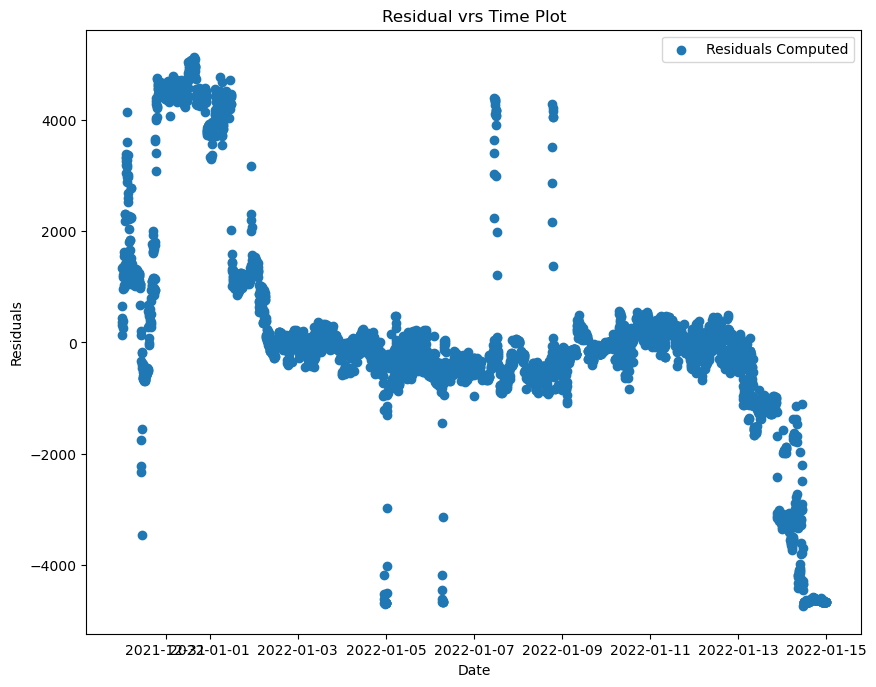

In [91]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Residual vrs Time Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')

# z = np.polyfit(x,y, 1)                   
# p = np.poly1d(z)                           # Linear Predicted Value
# plt.plot(x, p(x), "y.", label = "Residual line")
plt.scatter(x,y, label = 'Residuals Computed')
plt.legend()

In [92]:
r2_score(test_actual, test_pred)

-0.6953798815295613

In [93]:
test['Shaft Power'].mean()  # Actual

3961.226660282169

In [94]:
test_pred.mean()           # Predicted

4104.602108368819

In [95]:
test['Predicted Power'] = test_pred

In [96]:
test['Residual'] = (test['Shaft Power'] - test['Predicted Power'])/(test['Predicted Power'])

In [98]:
# test.to_csv(r'C:\Users\addsouza\Documents\Test_Output_VDD.csv', index = False)